In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotiing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Iris Flower Data set 
Iris is a flower wih following features
![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [2]:
""" Step 1 Data exploration """
# Check if running on Kaggle Notebook (you can define your own check)
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    # Load dataset from Kaggle
    iris = pd.read_csv('/kaggle/input/sololearn-iris/iris.csv')
else:
    # Load dataset locally
    iris = pd.read_csv('/workspaces/docker_python/data_science/datasets/iris.csv')
   

# Print the shape of dataset
print(iris.shape)

# Print the head
print(iris.head())

# Check the summary statistics
print(iris.describe())

# 'id' column is of no use thus we drop it
iris.drop('id', axis=1, inplace=True)

print(iris.head())

# To view the classes of categorical variable, 2 Methods
print(iris.groupby('species').size())

print(iris['species'].value_counts())
# The above dataset is a balanced dataset, its opposite being unbalanced dataset


(150, 6)
   id  sepal_len  sepal_wd  petal_len  petal_wd      species
0   0        5.1       3.5        1.4       0.2  iris-setosa
1   1        4.9       3.0        1.4       0.2  iris-setosa
2   2        4.7       3.2        1.3       0.2  iris-setosa
3   3        4.6       3.1        1.5       0.2  iris-setosa
4   4        5.0       3.6        1.4       0.2  iris-setosa
               id   sepal_len    sepal_wd   petal_len    petal_wd
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean    74.500000    5.843333    3.057333    3.758000    1.199333
std     43.445368    0.828066    0.435866    1.765298    0.762238
min      0.000000    4.300000    2.000000    1.000000    0.100000
25%     37.250000    5.100000    2.800000    1.600000    0.300000
50%     74.500000    5.800000    3.000000    4.350000    1.300000
75%    111.750000    6.400000    3.300000    5.100000    1.800000
max    149.000000    7.900000    4.400000    6.900000    2.500000
   sepal_len  sepal_wd  petal_l

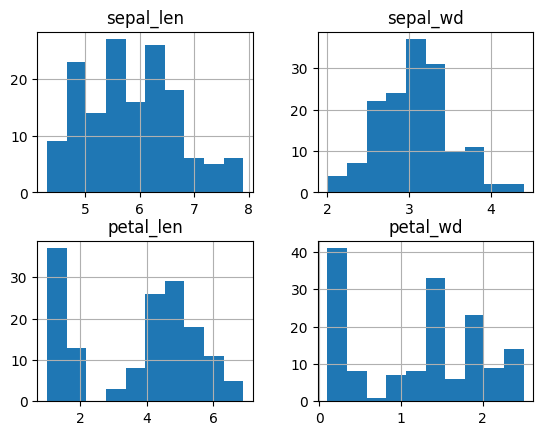

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


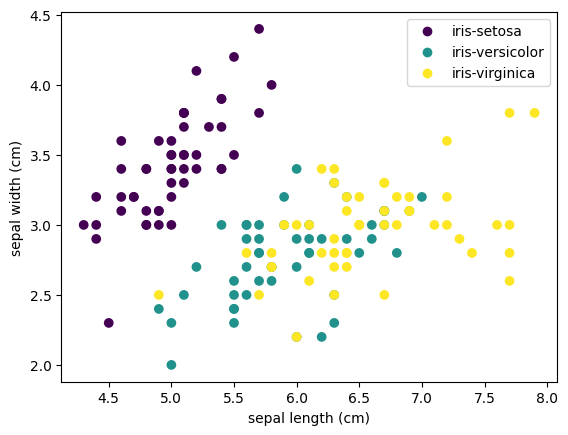

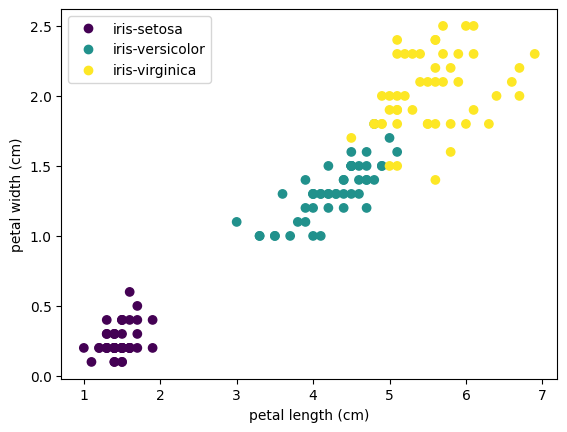

array([[<Axes: xlabel='sepal_len', ylabel='sepal_len'>,
        <Axes: xlabel='sepal_wd', ylabel='sepal_len'>,
        <Axes: xlabel='petal_len', ylabel='sepal_len'>,
        <Axes: xlabel='petal_wd', ylabel='sepal_len'>],
       [<Axes: xlabel='sepal_len', ylabel='sepal_wd'>,
        <Axes: xlabel='sepal_wd', ylabel='sepal_wd'>,
        <Axes: xlabel='petal_len', ylabel='sepal_wd'>,
        <Axes: xlabel='petal_wd', ylabel='sepal_wd'>],
       [<Axes: xlabel='sepal_len', ylabel='petal_len'>,
        <Axes: xlabel='sepal_wd', ylabel='petal_len'>,
        <Axes: xlabel='petal_len', ylabel='petal_len'>,
        <Axes: xlabel='petal_wd', ylabel='petal_len'>],
       [<Axes: xlabel='sepal_len', ylabel='petal_wd'>,
        <Axes: xlabel='sepal_wd', ylabel='petal_wd'>,
        <Axes: xlabel='petal_len', ylabel='petal_wd'>,
        <Axes: xlabel='petal_wd', ylabel='petal_wd'>]], dtype=object)

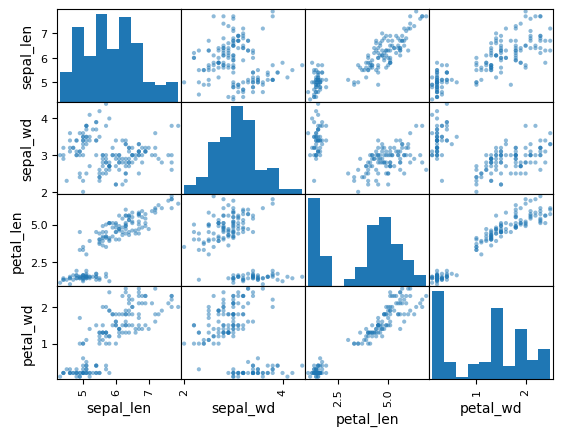

In [3]:
""" Data Visualization """

# Univariate Plots of Features
iris.hist()
plt.show()

# Multivariate Plotiing
# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0,
'iris-versicolor': 1,
'iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']] # assigns the color code 0/1/2 to the cloumn 'species'
print(colors)
# scatter plot of sepals
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()

# scatter plot of petals
# scatter plot
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

# Scatter matrix
pd.plotting.scatter_matrix(iris)

K nearest neighbors
K nearest neighbors (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote.

Here we see that changing k could affect the output of the model. In knn, k is a hyperparameter. A hyperparameter in machine learning is a parameter whose value is set before the learning process begins.

For example, in the figure below, there are two classes: blue squares and red triangles. What label should we assign to the green dot, with unknown label, based on the 3nn algorithm, i.e., when k is 3? Of the 3 closest data points from the green dot (solid line circle), two are red triangles and one is blue square, thus the green dot is predicted to be a red triangle. If k is 5 (dashed line circle), it is then classified as a blue square (3 blue squares versus 2 red triangles, blue squares are the majority).

![](https://lecontent.sololearn.com/material-images/00000d0d00000445531d0000fe0e0000_data%20visualization.png)

In [4]:
""" Modelling """
from sklearn.neighbors import KNeighborsClassifier

# Set the features and Target
X = iris[['petal_len', 'petal_wd']]
y = iris['species']

# Split the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

# Print the categorical count of train and test data 
print(y_train.value_counts())
print(y_test.value_counts())

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)

## fit 
print(knn.fit(X_train, y_train))
print("\n")

## Predict on test dataset
y_pred = knn.predict(X_test)
print(y_pred[:5])
print("\n")
print(y_pred[10:12]) # See the prediction on 11th and 12th elements

## Probablity Prediction - Doesnot label class output but probability of being classified to that class
y_pred_prob = knn.predict_proba(X_test)
print(y_pred_prob[10:12]) # predict for 11, 12 -> for 10th ele [1. 0. 0.] 
                          # Which means probability of the 11th flower being
                          # predicted an iris-setosa is 1, an iris-versicolor
                          # and an iris-virginica are both 0.
                          # For the next flower, there is a 20% chance that it
                          # would be classified as iris-versicolor but 80% chance to be iris-virginica.


species
iris-setosa        35
iris-virginica     35
iris-versicolor    35
Name: count, dtype: int64
species
iris-virginica     15
iris-setosa        15
iris-versicolor    15
Name: count, dtype: int64
KNeighborsClassifier()


['iris-virginica' 'iris-setosa' 'iris-setosa' 'iris-versicolor'
 'iris-versicolor']


['iris-setosa' 'iris-virginica']
[[1.  0.  0. ]
 [0.  0.2 0.8]]


For Above Cell, explanation: 
Probability Prediction: For example, the probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0. For the next flower, there is a 20% chance that it would be classified as iris-versicolor but 80% chance to be iris-virginica. What it tells us is that of the five nearest neighbours of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 are iris-virginica.

In [5]:
""" Model Evaluation """
# To measure Accuracy

# Check how many correct predictions were made
print((y_pred==y_test.values).sum()) # Correct Predictions
print(y_test.size) # Total Test size

# Effiecency 
print((y_pred==y_test.values).sum()/y_test.size)
print("\n")
# Effiecency r_score
print(knn.score(X_test, y_test))


44
45
0.9777777777777777


0.9777777777777777


Above code shows our model made 1 mistake

Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset.

Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions, broken down by each class.
In classifying the iris, we can use confusion_matrix() under module sklearn.metrics

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


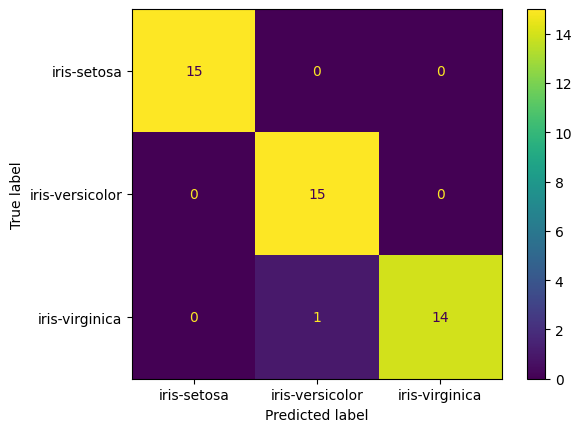

In [6]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))

# Above operation can be graphically done as 
from sklearn.metrics import ConfusionMatrixDisplay
mat = confusion_matrix(y_test, y_pred, labels=['iris-setosa', 'iris-versicolor', 'iris-virginica'])
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['iris-setosa', 'iris-versicolor', 'iris-virginica'])
disp.plot()

Confusion Matrix output Explanation:
1. 1st Row represnts comparsion of y_test (true) with y_pred (our prediction) for 1st class (setosa),
It is 15 0 0 <- No false predictions were done here
2. 2nd Row represnts comparsion of y_test (true) with y_pred (our prediction) for 2nd class (versicolor),
It is 0 15 0 <- No false predictions were done here
3. 3rd Row represnts comparsion of y_test (true) with y_pred (our prediction) for 3rd class (virginica),
It is 0 1 14 <- 1 virginica falsely classified as versicolor

K-fold Cross Validation

Conventional cross validation - train-test split before fitting the model also known as holdout method. 

However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.

In k fold cross validation: 
1. the data is divided into k subsets.
2. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model.
3. Then the accuracy is averaged over k trials to provide total effectiveness of the model. 

In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

As a general rule, 5-fold or 10-fold cross validation is preferred; but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.


In [7]:
""" K Cross Validation """
from sklearn.model_selection import cross_val_score
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
# train model with 5-fold cv (1 set - 20% data)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
# print each cv score (accuracy) 
print(cv_scores)
print(cv_scores.mean())

[0.96666667 0.96666667 0.9        0.93333333 1.        ]
0.9533333333333334


Grid Search 
What is the best k? 
Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. 
GridSearchCV, which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed the best.
The techniques of k-fold cross validation and tuning parameters with grid search is applicable to both classification and regression problems

In [8]:
from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
print(knn_gscv.best_params_) # Top performing param
print(knn_gscv.best_score_) # Accuracy of model when k is 4

# Now we are ready to build the final model
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

y_pred = knn_final.predict(X)
print(knn_final.score(X, y))

{'n_neighbors': 4}
0.9666666666666668
0.9733333333333334


Label Prediction with new Data

In [9]:
new_data = np.array([3.76, 1.20]) #New Data - petal len and petal width
new_data = new_data.reshape(1, -1)
print(knn_final.predict(new_data))

print("\n")

new_data = np.array([[3.76, 1.2], 
                     [5.25, 1.2],
                     [1.58, 1.2]])
print(knn_final.predict(new_data))
print("\n")
print(knn_final.predict_proba(new_data))

['iris-versicolor']


['iris-versicolor' 'iris-virginica' 'iris-setosa']


[[0.   1.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]]


/usr/local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
